<a href="https://colab.research.google.com/github/manogna5/handwritten_digits_classification/blob/master/classifyingdigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn

In [0]:
from torchvision import datasets,transforms

In [0]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [5]:
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
dataiter=iter(trainloader)
images,labels=dataiter.next()
images=images.view(images.shape[0],-1)
logits=model(images)
loss=criterion(logits,labels)
print(loss)

tensor(2.3079, grad_fn=<NllLossBackward>)


In [6]:
x=torch.randn(2,2,requires_grad=True)
print(x)

tensor([[ 1.0354, -0.0094],
        [ 0.2074, -0.0341]], requires_grad=True)


In [7]:
y=x**2
print(y)


tensor([[1.0720e+00, 8.7821e-05],
        [4.3016e-02, 1.1632e-03]], grad_fn=<PowBackward0>)


In [8]:
print(y.grad_fn)

In [9]:
z=y.mean()
print(z)

tensor(0.2791, grad_fn=<MeanBackward0>)


In [10]:
print(x.grad)

None


In [11]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.5177, -0.0047],
        [ 0.1037, -0.0171]])
tensor([[ 0.5177, -0.0047],
        [ 0.1037, -0.0171]], grad_fn=<DivBackward0>)


In [12]:
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
dataiter=iter(trainloader)
images,labels=dataiter.next()
images=images.view(images.shape[0],-1)
logits=model(images)
loss=criterion(logits,labels)
print(loss)

tensor(2.3154, grad_fn=<NllLossBackward>)


In [13]:
print(' before Backward pass:\n',model[0].weight.grad)
loss.backward()
print('after Backward pass:\n',model[0].weight.grad)


 before Backward pass:
 None
after Backward pass:
 tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 7.1023e-05,  7.1023e-05,  7.1023e-05,  ...,  7.1023e-05,
          7.1023e-05,  7.1023e-05],
        [ 4.7747e-04,  4.7747e-04,  4.7747e-04,  ...,  4.7747e-04,
          4.7747e-04,  4.7747e-04],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.1718e-03, -1.1718e-03, -1.1718e-03,  ..., -1.1718e-03,
         -1.1718e-03, -1.1718e-03]])


In [0]:
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [15]:
print('Initial weights=',model[0].weight)
dataiter=iter(trainloader)
images,labels=dataiter.next()
images.resize_(64,784)
optimizer.zero_grad()
output=model.forward(images)
loss=criterion(output,labels)
loss.backward()
print('Gradient',model[0].weight.grad)


Initial weights= Parameter containing:
tensor([[-0.0225,  0.0060,  0.0191,  ...,  0.0247, -0.0125, -0.0049],
        [-0.0071,  0.0036, -0.0181,  ..., -0.0209,  0.0054,  0.0334],
        [-0.0005,  0.0311,  0.0162,  ..., -0.0112,  0.0325,  0.0091],
        ...,
        [ 0.0217,  0.0220,  0.0315,  ...,  0.0044, -0.0319, -0.0254],
        [-0.0346,  0.0282,  0.0124,  ..., -0.0270,  0.0120, -0.0267],
        [ 0.0259, -0.0260, -0.0145,  ..., -0.0209,  0.0247,  0.0039]],
       requires_grad=True)
Gradient tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020]])


In [16]:
optimizer.step()
print('updated weights',model[0].weight.grad)

updated weights tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020]])


In [17]:
model=nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.003)
epochs=5
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output=model.forward(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss=running_loss+loss.item()
  else:
    print(f"training loss:'{running_loss/len(trainloader)}")


training loss:'1.8739422099676721
training loss:'0.857382290144719
training loss:'0.5392069739700635
training loss:'0.43658840492653694
training loss:'0.3892283331134172


In [18]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2020-02-27 04:41:53--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.2’

helper.py.2         100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-02-27 04:41:53 (38.2 MB/s) - ‘helper.py.2’ saved [2813/2813]



In [19]:
pip install helper

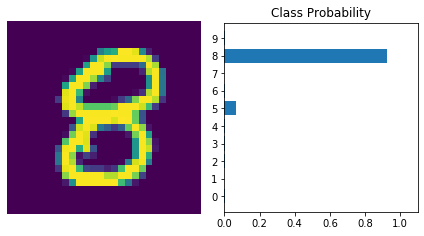

In [20]:
%matplotlib inline
import helper
images,labels=next(iter(trainloader))
img=images[0].view(1,784)
with torch.no_grad():
  logits=model.forward(img)
ps=F.softmax(logits,dim=1)
helper.view_classify(img.view(1,28,28),ps)
